<a href="https://colab.research.google.com/github/RubenRomeroTorrado/greends-avcad-2024/blob/main/exercicio7ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [5]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
print(df)
df.head(10)
df.info()
print(list(df.columns))

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [6]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df.drop(df.iloc[:,5:15], axis=1, inplace=True)
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo   
...          ...        ...        ...       ...            ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga   

     Water_source_type Flow_regime  Altitude Geological_typology  \
0              Pluvial   Permanent       199           Siliceous   
1          Groundwater   Permanent      1253          Calca

In [7]:
# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True"

In [8]:
# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes
# Number of values per variable
df.count()

Site_code                               5011
Latitude                                5011
Longitude                               5011
Country                                 5011
Catchment_name                          5011
Water_source_type                       4712
Flow_regime                             4473
Altitude                                5011
Geological_typology                     5011
Actual_river_slope                      4975
Natural_sediment                        4402
Elevation_mean_catch                    4841
prec_ann_catch                          4841
temp_ann                                4841
temp_jan                                4841
temp_jul                                4841
Barriers_catchment_down                 5011
Barriers_river_segment_up               5009
Barriers_river_segment_down             5009
Barriers_number_river_segment_up        5008
Barriers_number_river_segment_down      5009
Barriers_distance_river_segment_up      4998
Barriers_d

In [9]:
# Number of missing values (NaN) per variable
df.isnull().sum()

Site_code                                  0
Latitude                                   0
Longitude                                  0
Country                                    0
Catchment_name                             0
Water_source_type                        299
Flow_regime                              538
Altitude                                   0
Geological_typology                        0
Actual_river_slope                        36
Natural_sediment                         609
Elevation_mean_catch                     170
prec_ann_catch                           170
temp_ann                                 170
temp_jan                                 170
temp_jul                                 170
Barriers_catchment_down                    0
Barriers_river_segment_up                  2
Barriers_river_segment_down                2
Barriers_number_river_segment_up           3
Barriers_number_river_segment_down         2
Barriers_distance_river_segment_up        13
Barriers_d

In [10]:
df2 = df.dropna(how='all') # drops rows when all elements are missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB


In [11]:
df2 = df.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB


In [12]:
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 3.3+ MB


In [13]:
print(df['Catchment_name'].mode())

0    Ebro
Name: Catchment_name, dtype: object


In [14]:
# A fast way of getting a summary statistics of quantitative data (int or float)
df.describe()

,Latitude,Longitude,Altitude,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,5011.000000,5011.000000,5011.000000,4975.000000,4402.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,...,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,41.660286,-4.220392,428.072042,14.582432,3.062017,785.177935,941.823810,13.261950,6.211403,20.604503,...,0.000399,0.085412,0.000599,0.000399,0.012373,0.000200,0.196568,0.068250,0.132708,0.031132
std,1.654641,4.754419,342.912849,22.596125,0.567240,432.725266,292.497317,2.172315,2.662325,2.583101,...,0.019976,0.279522,0.024463,0.019976,0.110554,0.014127,0.397442,0.252199,0.339293,0.173690
min,36.213984,-9.459453,0.000000,0.000000,1.000000,52.249944,373.366940,3.900000,-2.700000,11.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.450919,-7.716600,142.000000,3.509500,3.000000,468.393265,677.473828,12.000000,4.300000,18.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.316060,-6.176062,375.000000,8.000000,3.000000,701.438554,968.898321,13.400000,6.400000,20.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.904789,-1.959129,610.500000,17.170000,3.000000,1049.983330,1168.356822,14.600000,8.300000,22.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.098423,15.625773,1851.000000,774.000000,4.000000,2545.546876,1739.000486,18.300000,12.500000,28.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df2.head() # after dropping NaNs

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,Nival,Permanent,1179,Siliceous,0.001,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,Nival,Permanent,1038,Siliceous,2.258,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,Pluvial,Permanent,636,Siliceous,0.263,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,Pluvial,Permanent,890,Calcareous,2.909,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,Groundwater,Permanent,872,Calcareous,3.530,...,0,0,0,0,0,0,1,0,0,0


Chi-square statistic: 1216.3927370383249
p-value: 7.305891841948134e-265


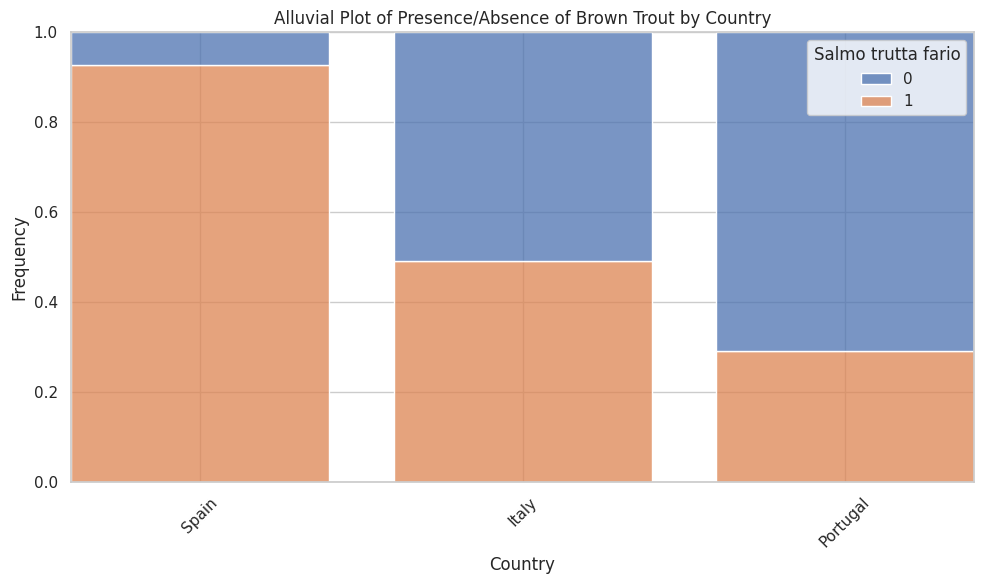

In [16]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('EFIplus_medit.zip', compression='zip', sep=";")

# Create a contingency table
contingency_table = pd.crosstab(df2['Country'], df2['Salmo trutta fario'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

# Null hypothesis: There is no association between presence/absence of Brown Trout and the country.

# Plot an alluvial plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(df2, x="Country", hue="Salmo trutta fario", multiple="fill", shrink=.8)
plt.title('Alluvial Plot of Presence/Absence of Brown Trout by Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Given the very low p-value, we reject the null hypothesis that there is no association between the presence/absence of Brown Trout and the country. This suggests that the presence/absence of Brown Trout is indeed dependent on the country.The plot indicates that it is more likely to be found in Spain than italy and much more than portugal.

In [17]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Filter the eight most sampled catchments
top_eight_catchments = df2['Catchment_name'].value_counts().nlargest(8).index

# Filter the dataframe to include only data from the top eight catchments
df_top_eight = df2[df2['Catchment_name'].isin(top_eight_catchments)]

# Perform ANOVA for the top eight catchments
f_statistic, p_value_anova = stats.f_oneway(*[df_top_eight[df_top_eight['Catchment_name'] == c]['Elevation_mean_catch'] for c in df_top_eight['Catchment_name'].unique()])
print("ANOVA - F-Statistic:", f_statistic)
print("ANOVA - P-Value:", p_value_anova)

# Define null hypothesis for ANOVA: There is no significant difference in the mean elevation among the catchments

# Perform Tukey's HSD post-hoc test for the top eight catchments
tukey_results = pairwise_tukeyhsd(df_top_eight['Elevation_mean_catch'], df_top_eight['Catchment_name'])
print("Tukey's HSD Results:")
print(tukey_results)

# Perform Kruskal-Wallis H test as non-parametric equivalent of ANOVA
h_statistic, p_value_kruskal = stats.kruskal(*[df_top_eight[df_top_eight['Catchment_name'] == c]['Elevation_mean_catch'] for c in df_top_eight['Catchment_name'].unique()])
print("Kruskal-Wallis H-Statistic:", h_statistic)
print("Kruskal-Wallis P-Value:", p_value_kruskal)

# Define null hypothesis for Kruskal-Wallis: There is no significant difference in the median elevation among the catchments


ANOVA - F-Statistic: 157.1736402882748
ANOVA - P-Value: 3.9710096360208786e-193
Tukey's HSD Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------
  Cantabrica        Douro   113.406 0.0002   37.6078  189.2042   True
  Cantabrica Galiza-Norte -219.0555    0.0 -280.5173 -157.5936   True
  Cantabrica   Galiza-Sul   32.9023 0.9841   -75.407  141.2115  False
  Cantabrica       Guadia -330.6163    0.0 -435.9711 -225.2614   True
  Cantabrica        Minho  258.0052    0.0  196.4999  319.5105   True
  Cantabrica      Mondego  -40.3519 0.9597 -153.0173   72.3134  False
  Cantabrica         Tejo -202.1506    0.0  -281.215 -123.0862   True
       Douro Galiza-Norte -332.4615    0.0 -399.2247 -265.6983   True
       Douro   Galiza-Sul  -80.5038 0.3568 -191.9068   30.8993  False
       Douro       Guadia -444.0223    0.0 -552.5552 -335.4

### Exercicio 7

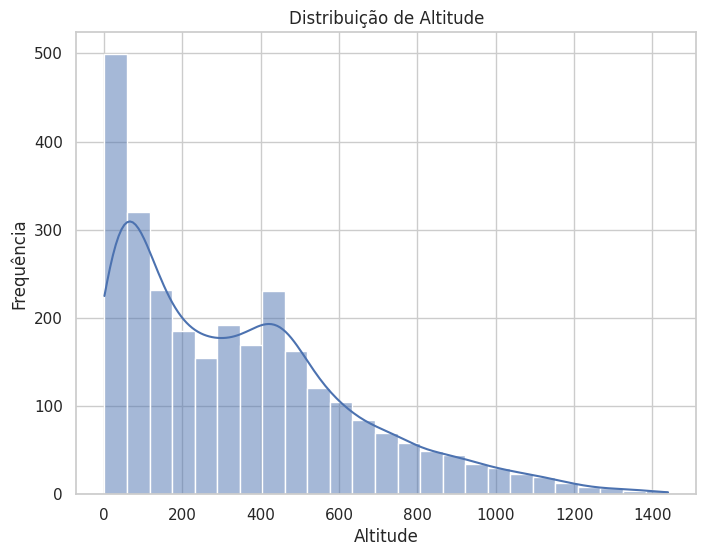

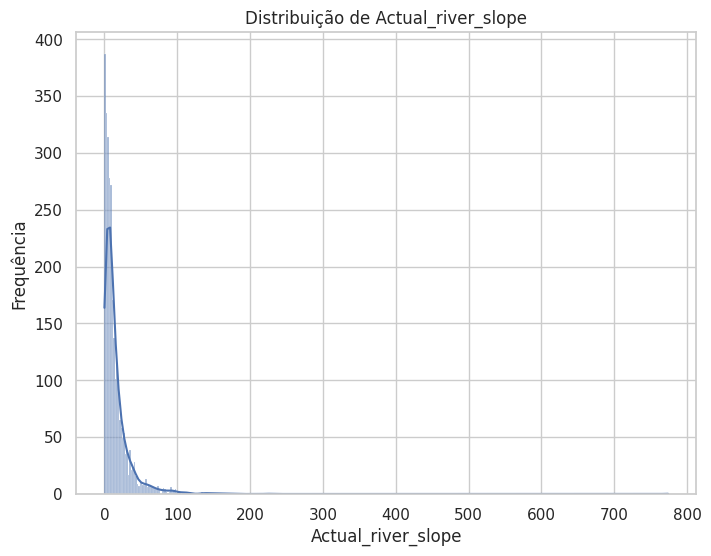

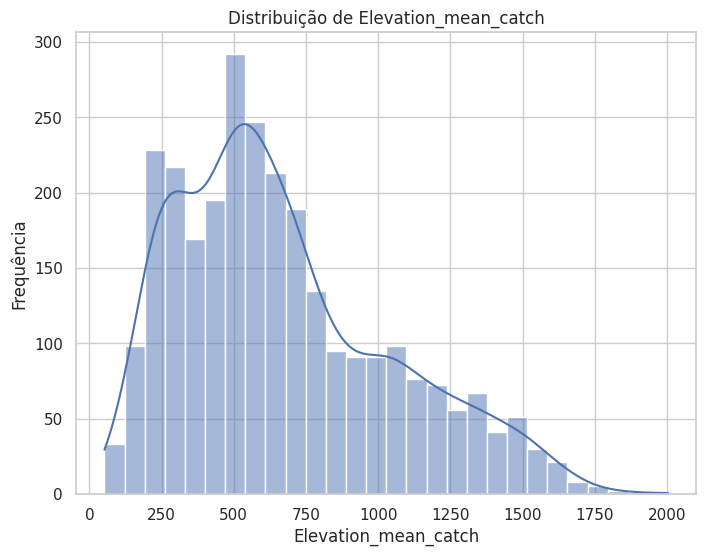

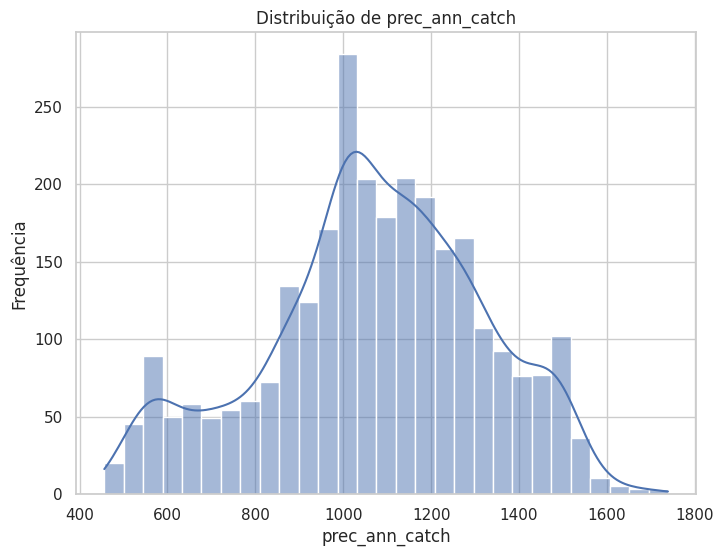

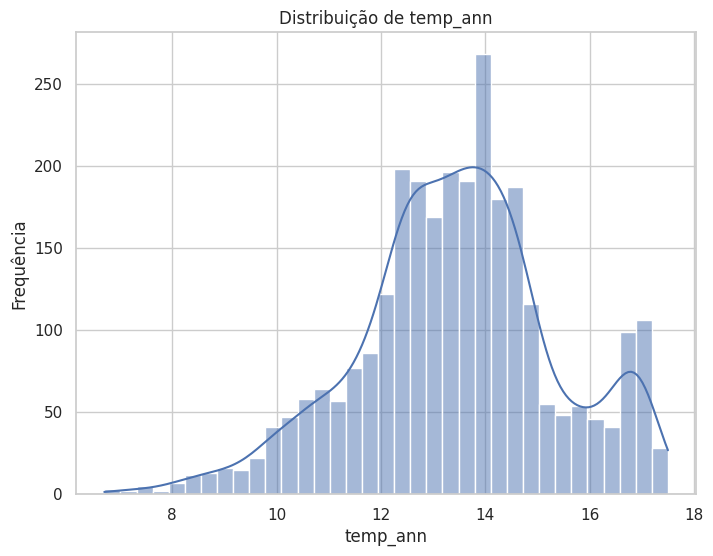

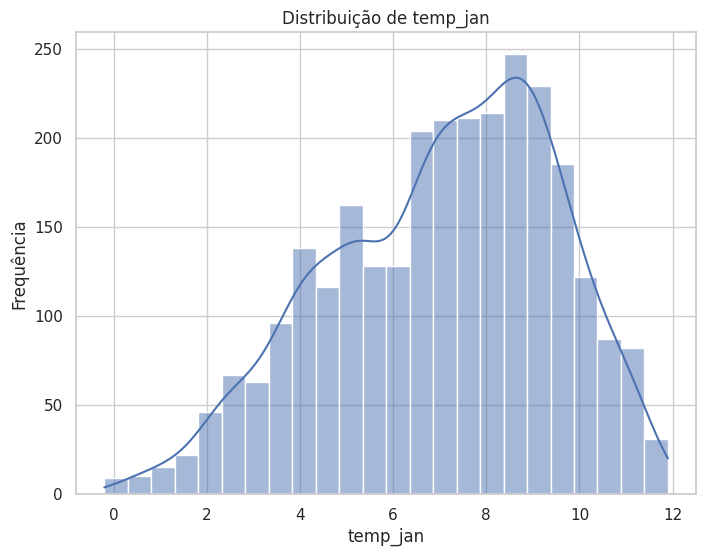

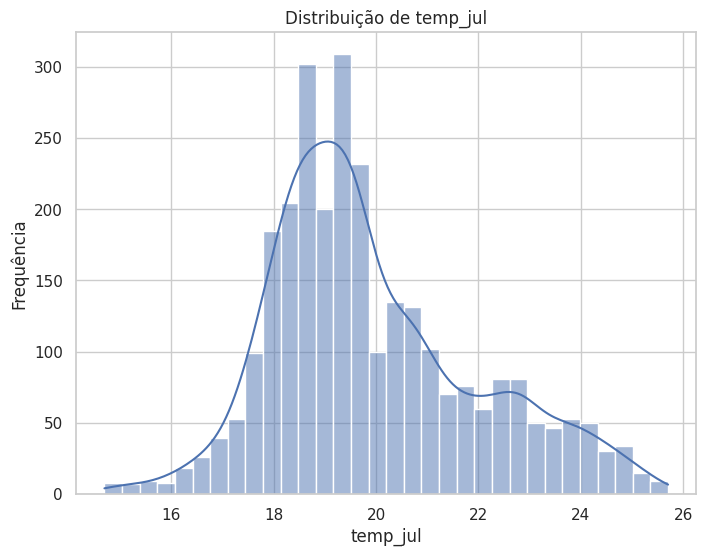

In [18]:
# Selecionar as variáveis contínuas de interesse
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Plotar a distribuição de cada variável
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[var], kde=True)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

todas precisam de transformação, vou aplicar a logaritmica, a raiz quadrada e a de boxcox

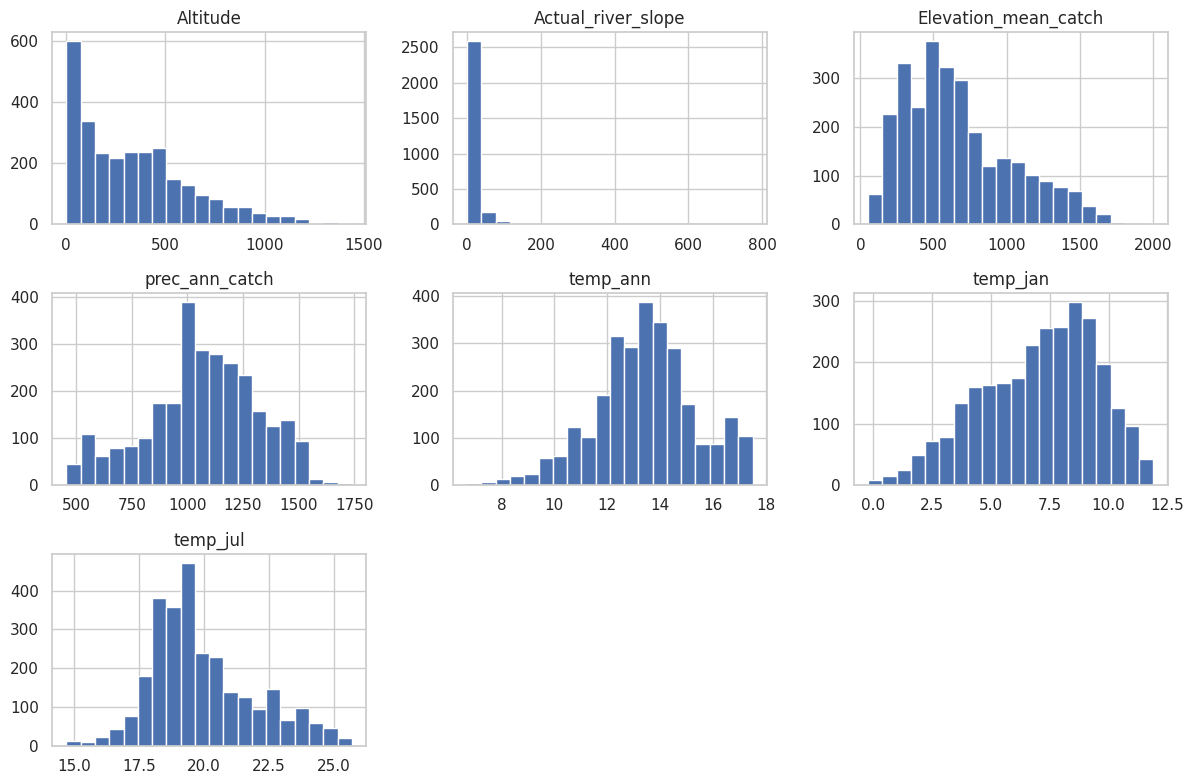

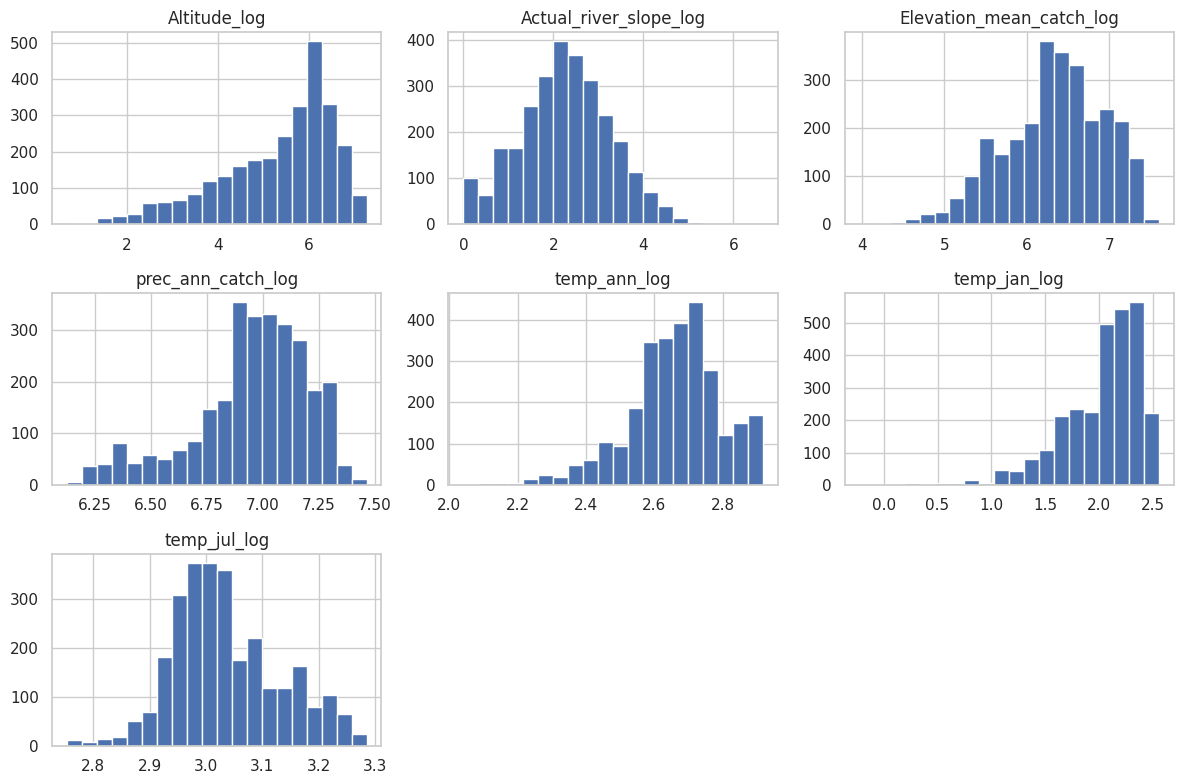

In [19]:
vars_to_transform = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']


# Visualizar as Distribuições Originais
plt.figure(figsize=(12, 8))
for i, var in enumerate(vars_to_transform, 1):
    plt.subplot(3, 3, i)
    plt.hist(df2[var], bins=20)
    plt.title(var)
plt.tight_layout()
plt.show()

# Aplicar a Transformação Logarítmica
for var in vars_to_transform:
    df2[var + '_log'] = np.log1p(df2[var])

# Visualizar as Novas Distribuições
plt.figure(figsize=(12, 8))
for i, var in enumerate(vars_to_transform, 1):
    plt.subplot(3, 3, i)
    plt.hist(df2[var + '_log'], bins=20)
    plt.title(var + '_log')
plt.tight_layout()
plt.show()

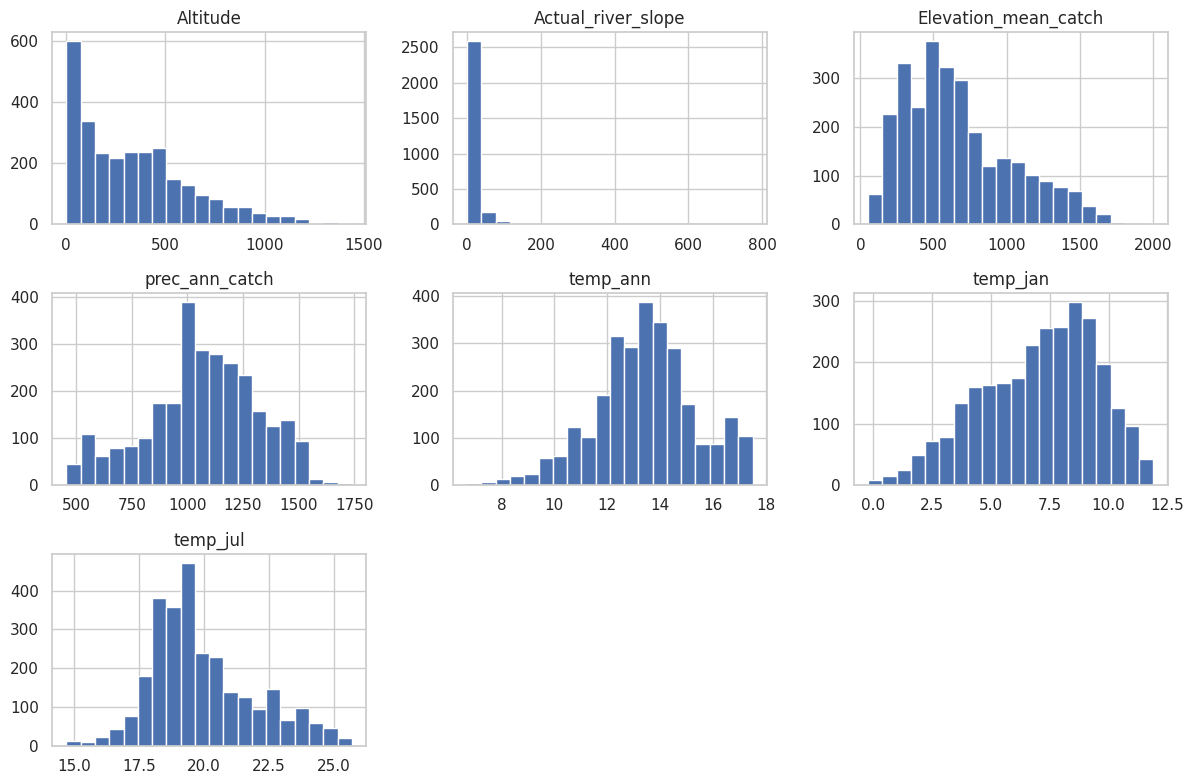

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


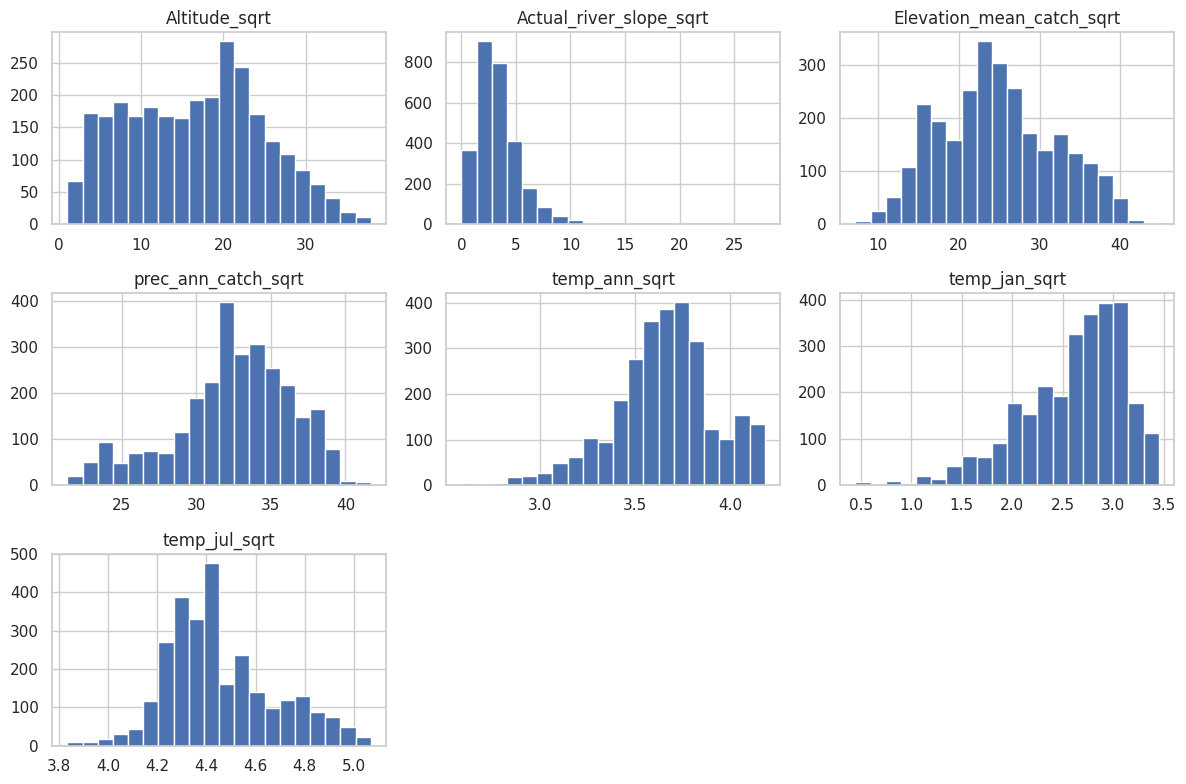

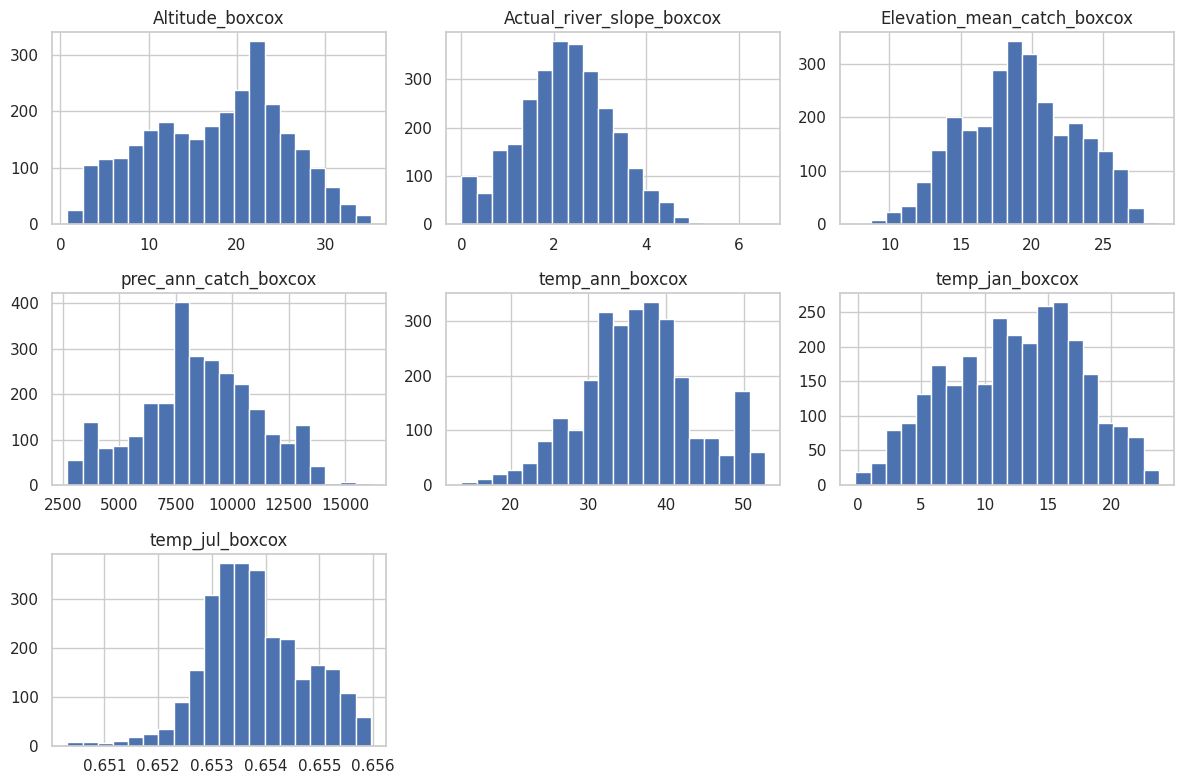

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Supondo que df seja o DataFrame que contém os dados

# Variáveis a serem transformadas
vars_to_transform = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch',
                     'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Visualizar as Distribuições Originais
plt.figure(figsize=(12, 8))
for i, var in enumerate(vars_to_transform, 1):
    plt.subplot(3, 3, i)
    plt.hist(df2[var], bins=20)
    plt.title(var)
plt.tight_layout()
plt.show()

# Aplicar a Transformação Raiz Quadrada
for var in vars_to_transform:
    df2[var + '_sqrt'] = np.sqrt(df2[var])

# Visualizar as Novas Distribuições (Raiz Quadrada)
plt.figure(figsize=(12, 8))
for i, var in enumerate(vars_to_transform, 1):
    plt.subplot(3, 3, i)
    plt.hist(df2[var + '_sqrt'], bins=20)
    plt.title(var + '_sqrt')
plt.tight_layout()
plt.show()


# Aplicar a Transformação Box-Cox
for var in vars_to_transform:
    df2[var + '_boxcox'], _ = boxcox(df2[var] + 1)  # Adiciona 1 para evitar valores negativos

# Visualizar as Novas Distribuições (Box-Cox)
plt.figure(figsize=(12, 8))
for i, var in enumerate(vars_to_transform, 1):
    plt.subplot(3, 3, i)
    plt.hist(df2[var + '_boxcox'], bins=20)
    plt.title(var + '_boxcox')
plt.tight_layout()
plt.show()


In [27]:
# Find the index of the 'Abramis brama' column
first_species_column_index = df2.columns.get_loc('Abramis brama')

# Create a new column 'Species_Richness' with the sum of species counts for each row
df2['Species_Richness'] = df2.iloc[:, first_species_column_index:].sum(axis=1)

# Display the DataFrame with the new column
print(df2['Species_Richness'])


18      14087.701756
19       9115.908024
28       6762.792299
32       7437.178218
43       6844.717041
            ...     
5006    21709.986999
5007    20850.665927
5008    20657.400824
5009    26495.023944
5010    24549.415127
Name: Species_Richness, Length: 2822, dtype: float64


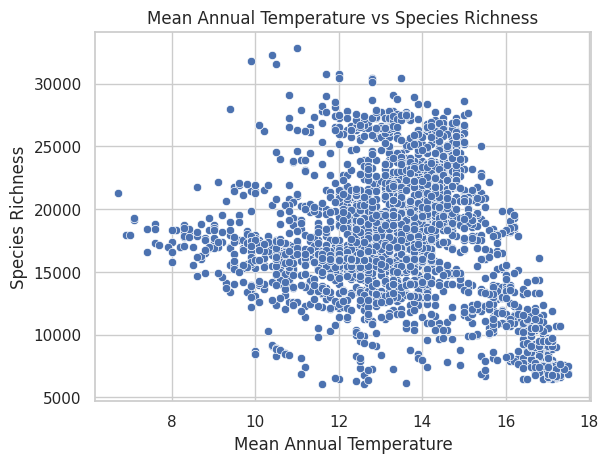

Infinity present in 'temp_ann': False
Very large values present in 'temp_ann': False
Infinity present in 'Species_Richness': False
Very large values present in 'Species_Richness': False


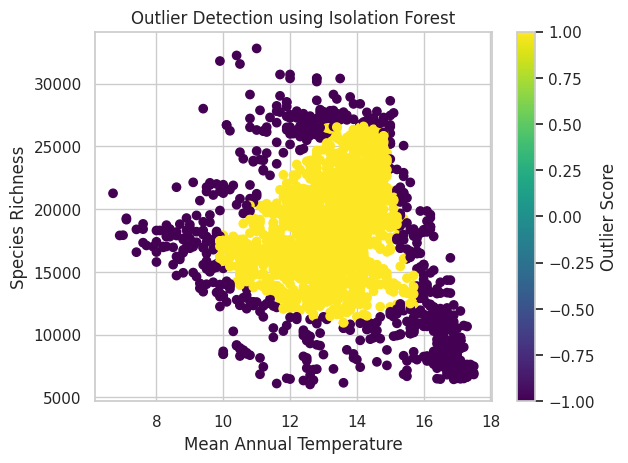

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Create a scatter plot of 'temp_ann' vs 'Species_Richness'
sns.scatterplot(x='temp_ann', y='Species_Richness', data=df2)
plt.title('Mean Annual Temperature vs Species Richness')
plt.xlabel('Mean Annual Temperature')
plt.ylabel('Species Richness')
plt.show()

# Extract the features for isolation forest
X = df2[['temp_ann', 'Species_Richness']]

# Check for infinity or very large values in the data
print("Infinity present in 'temp_ann':", np.any(np.isinf(df2['temp_ann'])))
print("Very large values present in 'temp_ann':", np.any(df2['temp_ann'] > 1e6))
print("Infinity present in 'Species_Richness':", np.any(np.isinf(df2['Species_Richness'])))
print("Very large values present in 'Species_Richness':", np.any(df2['Species_Richness'] > 1e6))

# Replace infinity or very large values with NaN in 'Species_Richness' column
df2.loc[df2['Species_Richness'] > 1e6, 'Species_Richness'] = np.nan

from sklearn.impute import SimpleImputer

# Impute missing values in the dataframe
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Fit isolation forest to detect outliers
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(X_imputed)

# Predict outliers
outliers = isolation_forest.predict(X_imputed)




# Plot the result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=outliers, cmap='viridis')
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Mean Annual Temperature')
plt.ylabel('Species Richness')
plt.colorbar(label='Outlier Score')
plt.show()
